# Kaggle

# -1) installation de la librairie python 

In [ ]:
!pip install kaggle

In [336]:
!kaggle

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: the following arguments are required: command


# 0 )import des librairies standards

In [1]:
import os
from pathlib import Path
from os.path import expanduser

# 1) configuration de Kaggle
on a créé un compte pour la classe, il faut avoir un json de configuration dans le fichier ~/.kaggle/kaggle.json
=> trouvable sur : https://github.com/romainjouin/esilv_5a/blob/master/kaggle.json

## 1.1) contenu du json

In [483]:
user_key = """
{"username":"esilvingenieur","key":"c03088899936654cb918df2576e1804b"}
"""

## 1.2)  Création du répertoire Kaggle pour écrire le json de configuration de la clef d'échange

In [484]:
home       = expanduser("~")
kaggle_dir = os.path.join(home, ".kaggle")
try        : os.mkdir(kaggle_dir)
except     : pass

gestion des exceptions => try / except

## 1.3) écriture du Json

In [5]:
kaggle_json = "kaggle.json"
output_file = os.path.join(kaggle_dir, kaggle_json)

with open(Path(output_file), "w") as f:
    f.write(user_key)

## 1.4) import de la librairie Kaggle

In [6]:
import kaggle

In [16]:
import os
os.system("chmod 600 /root/.kaggle/kaggle.json")

0

# 2) usage de kaggle en passant par les commandes systèmes

In [357]:
!kaggle datasets list

ref                                                      title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rajeevw/ufcdata                                          UFC-Fight historical data from 1993 to 2019          3MB  2019-07-05 09:58:02          11031        415  0.9705882        
gustavomodelli/forest-fires-in-brazil                    Forest Fires in Brazil                              31KB  2019-08-24 16:09:16          16336        381  0.7647059        
tristan581/17k-apple-app-store-strategy-games            17K Mobile Strategy Games                            8MB  2019-08-26 08:22:16          13427        481  0.9411765        
akhilv11/border-crossing-entry-data                      Border Crossing Entry Data                 

In [355]:
!kaggle datasets download grikomsn/amazon-cell-phones-reviews

100%|█████████████████████████████████████▊| 10.0M/10.0M [00:10<00:00, 1.33MB/s]
100%|███████████████████████████████████████| 10.0M/10.0M [00:10<00:00, 993kB/s]


In [358]:
!ls

TD6_CNN.ipynb				kaggle.ipynb	       test.zip
Untitled.ipynb				notebooks	       train
amazon-cell-phones-reviews.zip		sample_submission.csv  train.zip
chats_et_chiens_model_1.h5		submission.csv	       validation
dogs-vs-cats-redux-kernels-edition.zip	tensorflow-tutorials
hindi-bible.zip				test


In [354]:
!kaggle datasets download kapilverma/hindi-bible

100%|███████████████████████████████████████| 4.82M/4.82M [00:06<00:00, 885kB/s]
100%|███████████████████████████████████████| 4.82M/4.82M [00:06<00:00, 812kB/s]


# On ne peut pas télécharger tant qu'on n'a pas accepté les conditions d'une compétition, 
ce qu'on ne peut faire que depuis le site web, et pas via l'API

In [359]:
!kaggle competitions download -c dogs-vs-cats

403 - Forbidden


## Il aura fallu passer  par une phase manuelle d'acceptation des conditions de la compétition
https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data
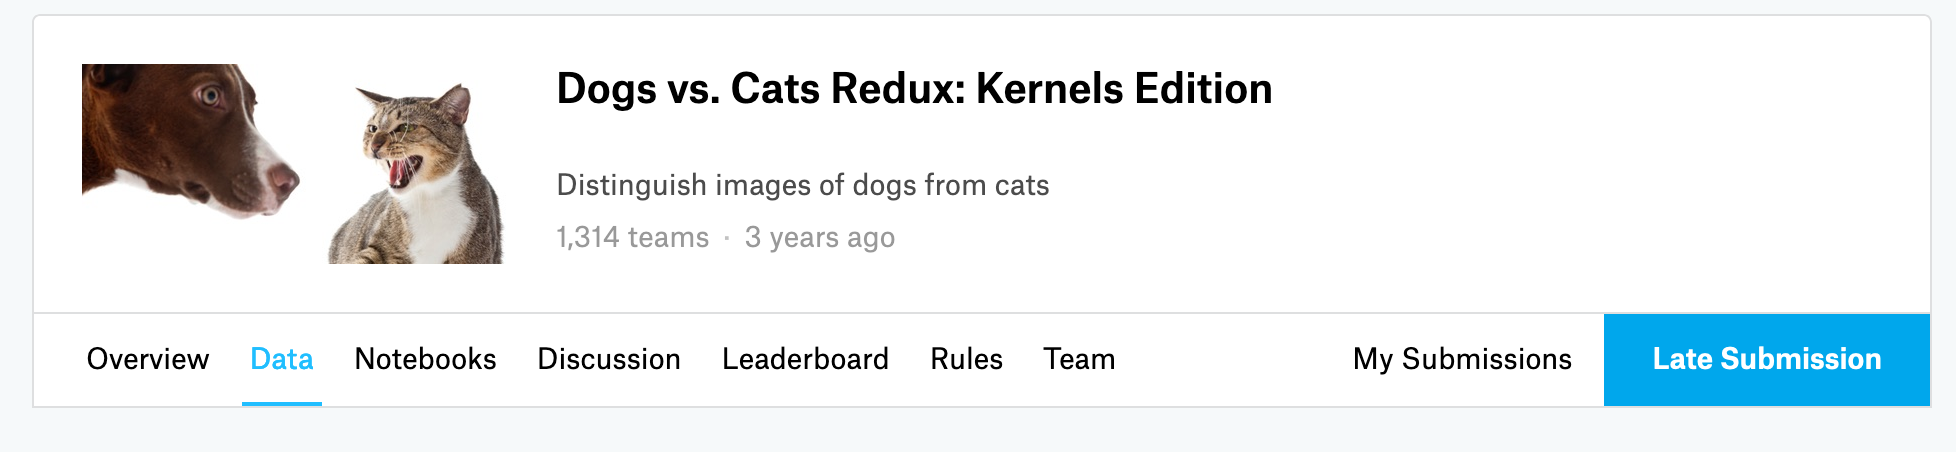


In [360]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

dogs-vs-cats-redux-kernels-edition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [17]:
!ls

Untitled.ipynb				kaggle.ipynb  tensorflow-tutorials
dogs-vs-cats-redux-kernels-edition.zip	notebooks


# 3) On utilise python pour dézipper

## 3.1) dézippe de l'archivage globale

In [23]:
from zipfile import ZipFile

In [26]:
zip_path = "./dogs-vs-cats-redux-kernels-edition.zip"
with ZipFile(zip_path, "r") as zipObj:
    zipObj.extractall()

In [27]:
!ls

Untitled.ipynb				notebooks	       test.zip
dogs-vs-cats-redux-kernels-edition.zip	sample_submission.csv  train.zip
kaggle.ipynb				tensorflow-tutorials


## 3.2) dézippe des jeux de test et de train

In [28]:
for ziped in ["test.zip", "train.zip"]:
    with ZipFile(ziped, "r") as zipObj:
        zipObj.extractall()

In [29]:
!ls

Untitled.ipynb				sample_submission.csv  train
dogs-vs-cats-redux-kernels-edition.zip	tensorflow-tutorials   train.zip
kaggle.ipynb				test
notebooks				test.zip


# 4) Récupérer les images de chats, et celles de chiens

## 4.1) la fonction "walk" permet de récupérer la liste des fichiers dans un répertoire

In [2]:
import os

In [508]:
generateur = os.walk("./train")

In [505]:
liste = list(generateur)

In [518]:
images = list(os.walk("./train"))[0][2]
images[:10]

['dog.3113.jpg',
 'dog.2969.jpg',
 'dog.7076.jpg',
 'dog.6687.jpg',
 'cat.4324.jpg',
 'dog.1687.jpg',
 'cat.11550.jpg',
 'cat.6316.jpg',
 'dog.1763.jpg',
 'dog.8815.jpg']

In [4]:
dogs = list(filter(lambda path: "dog" in path, images ))
cats = list(filter(lambda path: "cat" in path, images ))

In [519]:

dogs = list(map(lambda slug: f"./train/{slug}", dogs))
cats = list(map(lambda slug: f"./train/{slug}", cats))

In [520]:
len(dogs), len(cats)

(12500, 12500)

## Il y a aussi les images à prédire

In [98]:
a_predire = list(os.walk("./test"))[0][2]
a_predire = list(map(lambda slug: f"./test/{slug}", a_predire))

## 4.2) création d'un jeu de test et d'apprentissage

In [370]:
limite = int(len(dogs)*0.8)

In [386]:
limite     = 10000
train_dogs = dogs[        : limite ]
train_cats = cats[        : limite ]
test_dogs  = dogs[ limite :        ]
test_cats  = cats[ limite :        ]


## 4.3) affichage d'exemples -> toutes les images ne sont pas à la même taille

In [8]:
%matplotlib inline
from IPython.display import Image

./train/cat.10314.jpg


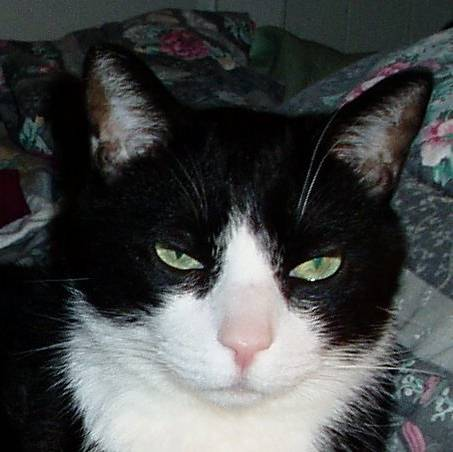

In [522]:
image_path = train_cats[2909]
print(image_path)
Image(image_path)

./train/cat.3933.jpg


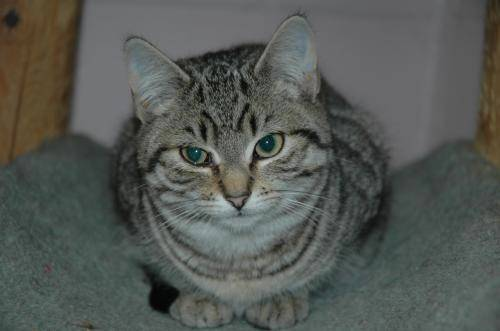

In [391]:
image_path = train_cats[890]
print(image_path)
Image(image_path)

# 5) préprocessing  : transformer les images en matrice de chiffres, sur 3 couleurs, et dans des tailles fixes

In [392]:
from keras.preprocessing.image import ImageDataGenerator


ImageDataGenerator(  
- featurewise_center=False,  
- samplewise_center=False,  
- featurewise_std_normalization=False,  
- samplewise_std_normalization=False,  
- zca_whitening=False,  
- zca_epsilon=1e-06,  
- rotation_range=0,  
- width_shift_range=0.0,  
- height_shift_range=0.0,  
- brightness_range=None,  
- shear_range=0.0,  
- zoom_range=0.0,  
- channel_shift_range=0.0,  
- fill_mode='nearest',  
- cval=0.0,  
- horizontal_flip=False,  
- vertical_flip=False,  
- rescale=None,  
- preprocessing_function=None,  
- data_format='channels_last',  
- validation_split=0.0,  
- interpolation_order=1,  
- dtype='float32',  
)  


# 5.0) il nous faut mettre les images dans une structure de dossier qui donne la classe

In [12]:
import shutil # pour copier des fichiers d'un emplacement à un autre

In [99]:
targets = {
    "./train/cats"           : train_cats ,
    "./train/dogs"           : train_dogs ,
    "./test/cats"            : test_cats  ,
    "./test/dogs"            : test_dogs  ,
    "./validation/a_predire" : a_predire  ,
}


In [100]:
for target_dir, images in targets.items():
    print(target_dir)
    os.makedirs(target_dir, exist_ok=True)
    for source in images:
        nom_image   = os.path.basename(source)
        destination = os.path.join(target_dir, nom_image)
        shutil.copyfile(source, destination)
        print(".", end="")

./validation/a_predire
.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

# 5.1) on peut ensuite s'appuyer sur cette structure pour utiliser un générateur transformant les images en matrice à 3 dimensions, et rescalées 

In [406]:
rescale     = 1./255
target_size = (150, 150)
batch_size  = 20
class_mode  = 'binary'

In [407]:
generator = ImageDataGenerator(rescale=rescale) # on rescale les couleurs entre 0 et 255


In [523]:
target_dir     = "./train"
train_generator = generator.flow_from_directory(
                              target_dir                ,
                              target_size = target_size , 
                              batch_size  = batch_size  , 
                              class_mode  = class_mode  )

Found 20000 images belonging to 2 classes.


In [409]:
target_dir     = "./test"
test_generator = generator.flow_from_directory(
                              target_dir                ,
                              target_size = target_size , 
                              batch_size  = batch_size  ,
                              class_mode  = class_mode  )

Found 5000 images belonging to 2 classes.


## 5.2) regardons le résultat

In [410]:
!pip install pillow # Il faut redémarrer le kernel si installation de pillow
# => ne rejouez que les cellules utiles (pas la peine de retélécharger
# la base par exemple)

You should consider upgrading via the 'pip install --upgrade pip' command.


In [411]:
import PIL 

In [413]:
for test_data in test_generator:
    print(test_data)
    break

(array([[[[1.        , 1.        , 0.9686275 ],
         [0.9803922 , 0.9803922 , 0.94117653],
         [0.98823535, 1.        , 0.9490197 ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 0.9686275 ],
         [0.9803922 , 0.9803922 , 0.94117653],
         [0.98823535, 1.        , 0.9490197 ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 0.9686275 ],
         [0.9803922 , 0.9803922 , 0.94117653],
         [0.98823535, 1.        , 0.9490197 ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.43529415, 0.3921569 , 0.21568629],
         [0.49803925, 0.454902  , 0.2784314 

### shape des data générées

In [527]:
len(test_data), len(test_data[0]), len(test_data[1])

(2, 20, 20)

In [528]:
test_data[0][0].shape

(150, 150, 3)

In [529]:
test_data[1]

array([1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0.], dtype=float32)

# 4) création d'un model 

In [418]:
!pip install keras

You should consider upgrading via the 'pip install --upgrade pip' command.


In [419]:
from keras import layers
from keras import models


# 4.1) layers composant le modèle

In [420]:
largeur_image      = 150
hauteur_image      = 150
nb_couleur         = 3

nb_neurones        = 32
size_features_map  = (3,3)
relu               = 'relu'

nb_pxl_pooling     = (2,2)
stride_pooling     = nb_pxl_pooling

input_shape        = (largeur_image ,hauteur_image , nb_couleur )

layer_1  = layers.Conv2D       ( nb_neurones    , size_features_map , activation  = relu , 
                                                                      input_shape = input_shape )
layer_2  = layers.MaxPooling2D ( nb_pxl_pooling , stride_pooling                         )
layer_3  = layers.Conv2D       ( 2*nb_neurones  , size_features_map , activation  = relu )
layer_4  = layers.MaxPooling2D ( nb_pxl_pooling , stride_pooling                         )
layer_5  = layers.Conv2D       ( 4*nb_neurones  , size_features_map , activation  = relu )
layer_6  = layers.MaxPooling2D ( nb_pxl_pooling , stride_pooling                         )
layer_7  = layers.Conv2D       ( 4*nb_neurones  , size_features_map , activation  = relu )
layer_8  = layers.MaxPooling2D ( nb_pxl_pooling , stride_pooling                         )


layer_9  = layers.Flatten()
layer_10 = layers.Dense(512, activation = relu)
layer_11 = layers.Dense(1  , activation = 'sigmoid')

## 4.2) aggrégation des layers dans un modèle

In [421]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layer_1 )
model.add(layer_2 )
model.add(layer_3 )
model.add(layer_4 )
model.add(layer_5 )
model.add(layer_6 )
model.add(layer_7 )
model.add(layer_8 )
model.add(layer_9 )
model.add(layer_10 )
model.add(layer_11 )

## 4.3) calcul du nombre de paramètres 

In [422]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 15, 15, 128)      

## 4.4) compilation du modèle

In [423]:
from keras import optimizers

In [530]:
loss          = 'binary_crossentropy'
learning_rate = 1e-4
metrics       = ['acc'] 
optimizer     = optimizers.RMSprop(lr = learning_rate )

model.compile( loss      = loss      , 
               optimizer = optimizer , 
               metrics   = metrics   )

## 4.5) apprentissage

In [425]:
history = model.fit_generator(train_generator                   ,
                              steps_per_epoch  = 100            ,
                              epochs           = 30             ,
                              validation_data  = test_generator ,
                              validation_steps = 50             )

Epoch 1/30
100/100 [==============================] - 45s 453ms/step - loss: 0.6891 - acc: 0.5300 - val_loss: 0.6728 - val_acc: 0.5940
Epoch 2/30
100/100 [==============================] - 58s 584ms/step - loss: 0.6686 - acc: 0.5860 - val_loss: 0.6903 - val_acc: 0.5850
Epoch 3/30
100/100 [==============================] - 49s 492ms/step - loss: 0.6493 - acc: 0.6095 - val_loss: 0.6565 - val_acc: 0.6250
Epoch 4/30
100/100 [==============================] - 50s 501ms/step - loss: 0.6328 - acc: 0.6290 - val_loss: 0.5715 - val_acc: 0.6950
Epoch 5/30
100/100 [==============================] - 49s 491ms/step - loss: 0.5754 - acc: 0.7080 - val_loss: 0.5714 - val_acc: 0.6990
Epoch 6/30
100/100 [==============================] - 48s 478ms/step - loss: 0.5745 - acc: 0.6975 - val_loss: 0.4414 - val_acc: 0.6840
Epoch 7/30
100/100 [==============================] - 47s 465ms/step - loss: 0.5712 - acc: 0.7010 - val_loss: 0.5231 - val_acc: 0.7040
Epoch 8/30
100/100 [==============================] - 4

## 4.6) enregistrement du modèle sur disque

In [89]:
model.save("chats_et_chiens_model_1.h5")

## 4.7) on regarde les résultats

In [427]:
histoire = history.history

In [531]:
histoire

{'val_loss': [0.6728209853172302,
  0.6903076767921448,
  0.6564760208129883,
  0.5715080499649048,
  0.571355938911438,
  0.4413556456565857,
  0.5231307744979858,
  0.46377477049827576,
  0.5126522779464722,
  0.5314621925354004,
  0.5640844106674194,
  0.6976696252822876,
  0.5869150161743164,
  0.6208173632621765,
  0.41699814796447754,
  0.36311912536621094,
  0.4031558930873871,
  0.4655250608921051,
  0.33833202719688416,
  0.36852484941482544,
  0.3317394256591797,
  0.4326149821281433,
  0.4709815979003906,
  0.4458276629447937,
  0.6368676424026489,
  0.4552968144416809,
  0.5930975675582886,
  0.43967825174331665,
  0.3283199667930603,
  0.4101186692714691],
 'val_acc': [0.593999981880188,
  0.5849999785423279,
  0.625,
  0.6949999928474426,
  0.6990000009536743,
  0.6840000152587891,
  0.7039999961853027,
  0.6639999747276306,
  0.7059999704360962,
  0.7409999966621399,
  0.7450000047683716,
  0.7269999980926514,
  0.753000020980835,
  0.7789999842643738,
  0.77100002765655

In [ ]:
!pip install pandas

In [428]:
import pandas as pd

In [532]:
df = pd.DataFrame(histoire)
df

,val_loss,val_acc,loss,acc
0,0.672821,0.594,0.689131,0.5300
1,0.690308,0.585,0.668641,0.5860
2,0.656476,0.625,0.649308,0.6095
3,0.571508,0.695,0.632822,0.6290
4,0.571356,0.699,0.575409,0.7080
5,0.441356,0.684,0.574473,0.6975
6,0.523131,0.704,0.571165,0.7010
7,0.463775,0.664,0.555969,0.7085
8,0.512652,0.706,0.541210,0.7345
9,0.531462,0.741,0.528646,0.7350


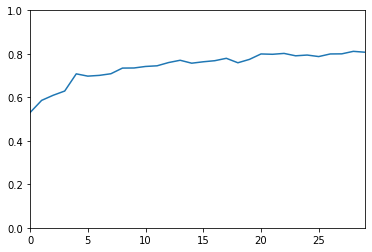

In [533]:
df.acc.plot(ylim=(0,1))

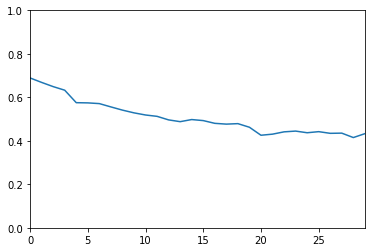

In [432]:
df.loss.plot(ylim=(0,1))

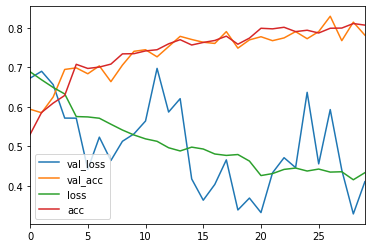

In [433]:
df.plot()

# 4.8) on peut faire une prédiction

### 4.8.1) on fait un générateur sur le dossier à valider
=> penser à mettre shuffle à faux !

In [107]:
generator             = ImageDataGenerator(rescale=rescale) # on rescale les couleurs entre 0 et 255
target_dir            = "./validation/"
validation_generator  = generator.flow_from_directory(
                              target_dir                ,
                              target_size = target_size , 
                              batch_size  = batch_size  ,
                              class_mode  = None        ,
                              shuffle     = False)

Found 12500 images belonging to 1 classes.


### 4.8.2) on utilise le modèle pour  prédire le générateur

In [154]:
predictions = model.predict_generator(
                        validation_generator       , 
                        workers             = 5    , 
                        use_multiprocessing = True )
predictions

array([[0.7190592 ],
       [0.27684814],
       [0.5415394 ],
       ...,
       [0.64621454],
       [0.2720807 ],
       [0.55631256]], dtype=float32)

### 4.8.3) on rassemble les prédictions avec les noms des fichiers

In [535]:
l_1 = list(range(10))
l_2 = list(range(5))
list(zip(l_1, l_2))


[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4)]

In [ ]:
predictions = list(zip(validation_generator.filepaths, predictions))


In [434]:
predictions

[('./validation/a_predire/1.jpg', array([0.7190592], dtype=float32)),
 ('./validation/a_predire/10.jpg', array([0.27684814], dtype=float32)),
 ('./validation/a_predire/100.jpg', array([0.5415394], dtype=float32)),
 ('./validation/a_predire/1000.jpg', array([0.88615274], dtype=float32)),
 ('./validation/a_predire/10000.jpg', array([0.7796849], dtype=float32)),
 ('./validation/a_predire/10001.jpg', array([0.28994828], dtype=float32)),
 ('./validation/a_predire/10002.jpg', array([0.316589], dtype=float32)),
 ('./validation/a_predire/10003.jpg', array([0.9669731], dtype=float32)),
 ('./validation/a_predire/10004.jpg', array([0.6135483], dtype=float32)),
 ('./validation/a_predire/10005.jpg', array([0.14127997], dtype=float32)),
 ('./validation/a_predire/10006.jpg', array([0.17734614], dtype=float32)),
 ('./validation/a_predire/10007.jpg', array([0.39106855], dtype=float32)),
 ('./validation/a_predire/10008.jpg', array([0.1881955], dtype=float32)),
 ('./validation/a_predire/10009.jpg', array

## 4.8.4) on regarde le résultat

In [183]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random

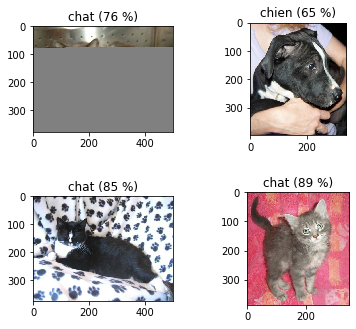

In [538]:
f, axes = plt.subplots(2,2,squeeze=False,)
axes    = [x for y in axes for x in y]
i       = 0

for (source, [proba]) in random.choices(predictions,k=4):
    image     = mpimg.imread(source)    
    categorie = "chat"      if     proba <  0.5    else "chien"
    proba     = 1-proba if categorie == "chat" else proba
    axes[i].imshow(image)
    axes[i].set_title(f"{categorie} ({100*proba:.0f} %)")
    i      = i+1

plt.subplots_adjust(top    = 0.99 , 
                    bottom = 0.01 , 
                    hspace = 0.5  , 
                    wspace = 0.4  )


# 5) soumettre à Kaggle

## 5.1) on transforme les probabilités en prédiction binaire 

In [441]:
seuil     = 0.5
to_submit = [0 if p[1]<seuil else 1 for p in predictions]

In [442]:
len(to_submit)

12500

## 5.2) on crée une dataFrame pour enregistrer en csv

In [224]:
data = {    
    "id"    : list(range(1,1+len(to_submit))), # attention, les id doivent commencer à 1 !
    "label" : to_submit}
df = pd.DataFrame(data)

In [225]:
df.label.value_counts()

0    6424
1    6076
Name: label, dtype: int64

In [220]:
df.to_csv("submission.csv", index=False)

In [221]:
!head submission.csv

id,label
1,1
2,0
3,1
4,1
5,1
6,0
7,0
8,1
9,1


## 5.3) on soumet à Kaggle

In [443]:
!kaggle competitions submit -f submission.csv -m "romain jouin" -c dogs-vs-cats-redux-kernels-edition

100%|██████████████████████████████████████| 86.8k/86.8k [00:05<00:00, 17.2kB/s]
Successfully submitted to Dogs vs. Cats Redux: Kernels Edition

In [222]:
!kaggle competitions submit -f submission.csv -m "romain jouin" -c dogs-vs-cats-redux-kernels-edition

100%|██████████████████████████████████████| 86.8k/86.8k [00:04<00:00, 19.5kB/s]
Successfully submitted to Dogs vs. Cats Redux: Kernels Edition

## 5.4) on regarde le score obtenu 

In [539]:
!kaggle competitions submissions -c dogs-vs-cats-redux-kernels-edition

fileName        date                 description             status    publicScore  privateScore  
--------------  -------------------  ----------------------  --------  -----------  ------------  
submission.csv  2019-11-29 17:00:09  premiere_soumission     complete  17.31107     None          
submission.csv  2019-11-29 14:26:22  raphael_henin           complete  17.43267     None          
submission.csv  2019-11-29 14:25:31  raphael_henin           complete  17.51827     None          
submission.csv  2019-11-29 14:24:37  raphael_henin           complete  17.53486     None          
submission.csv  2019-11-29 14:23:44  raphael_henin           complete  17.35519     None          
submission.csv  2019-11-29 14:18:59  raphael_henin           complete  17.50444     None          
submission.csv  2019-11-29 14:17:59  raphael_henin           complete  17.33028     None          
submission.csv  2019-11-29 14:12:43  romain jouin            complete  17.55142     None          
submission

# 6) Regarder l'intérieur d'un modèle

## 6.1) prendre une image

In [449]:
image_a_predire = predictions[10][0]
image_a_predire

'./validation/a_predire/10006.jpg'

In [450]:
from keras.preprocessing import image
import numpy as np

In [451]:
img = image.load_img(image_a_predire, target_size=target_size)

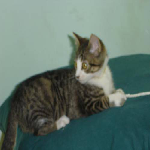

In [452]:
img

In [453]:
tenseur = image.img_to_array(img)

In [454]:
tenseur.shape

(150, 150, 3)

In [455]:
tenseur = np.expand_dims(tenseur, axis=0)
tenseur.shape

(1, 150, 150, 3)

In [456]:
len(model.layers)

11

## 6.2) créer un modèle avec plusieurs sorties => UNE SORTIE PAR LAYER

In [457]:
layers_outputs = [layer.output for layer in model.layers]
name_layers    = [layer.name   for layer in model.layers]
name_layers

['conv2d_26',
 'max_pooling2d_24',
 'conv2d_27',
 'max_pooling2d_25',
 'conv2d_28',
 'max_pooling2d_26',
 'conv2d_29',
 'max_pooling2d_27',
 'flatten_7',
 'dense_13',
 'dense_14']

In [298]:
activation_model = models.Model( inputs  = model.input    ,
                                 outputs = layers_outputs )

## 6.3) prédire une image, et regarder chaque activation

In [299]:
activations = activation_model.predict(tenseur)

In [300]:
type(activations)

list

In [301]:
len(activations)

11

### Activation premier layer

In [302]:
premier_layer = activations[0]
premier_layer.shape

(1, 148, 148, 32)

In [303]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 15, 15, 128)      

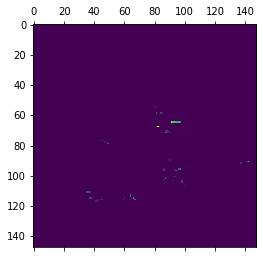

In [458]:
plt.matshow(premier_layer[0, :,:,4])

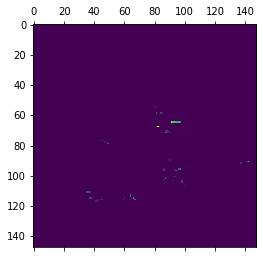

In [304]:
plt.matshow(premier_layer[0, :,:,4])

In [306]:
len(activations)

11

In [307]:
len(axes)

12

## 6.4) activation de chaque layer

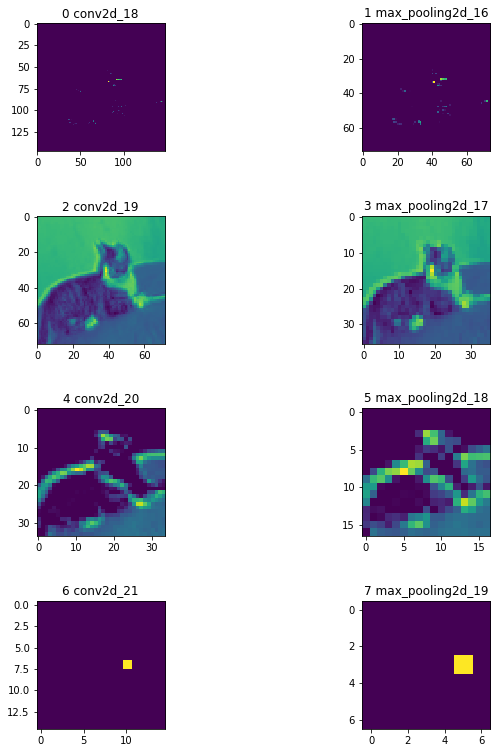

In [319]:
f, axes = plt.subplots(4,2, figsize=(10,10))

axes    = [x for y in axes for x in y]
i       = 0
for couche in activations[:8]:
    axes[i].imshow(couche[0, :,:,4])
    axes[i].set_title(f"{i} {name_layers[i]}")
    i      = i+1
    
plt.subplots_adjust(top    = 0.99 , 
                    bottom = 0.01 , 
                    hspace = 0.5  , 
                    wspace = 0.4  )

    

## 6.5) activation par channel

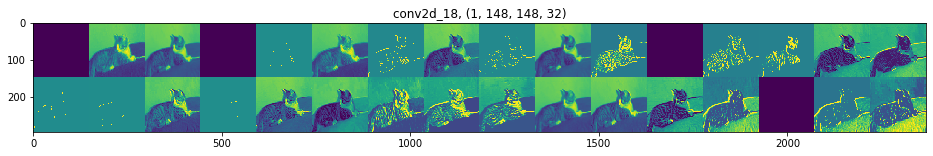

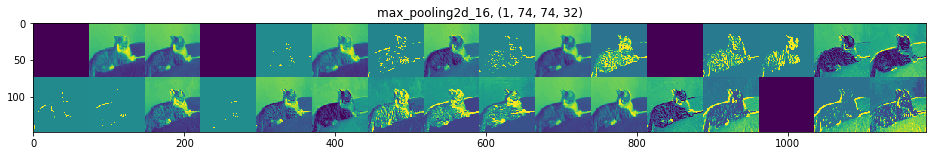

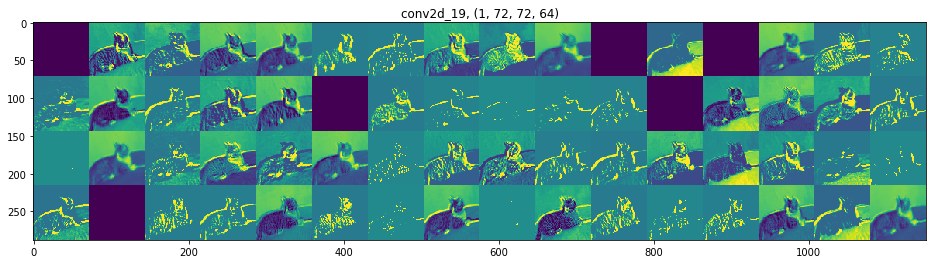

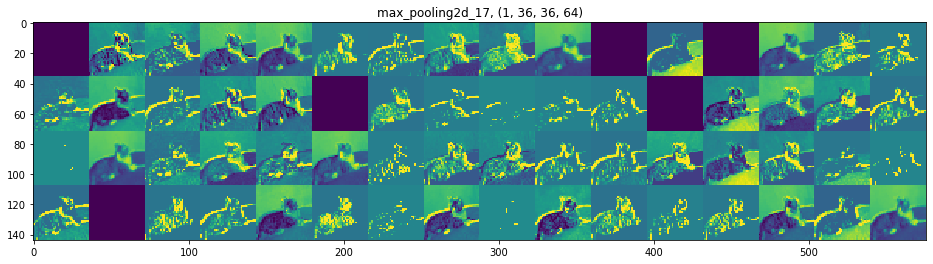

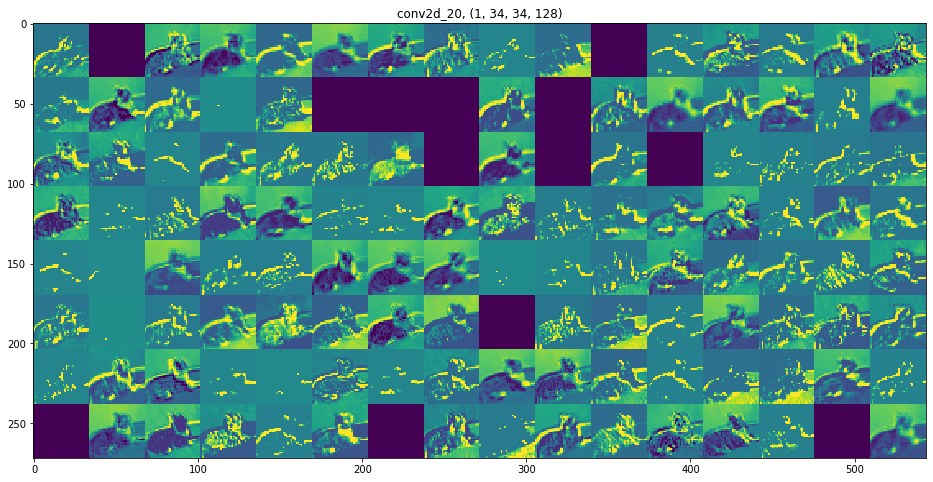

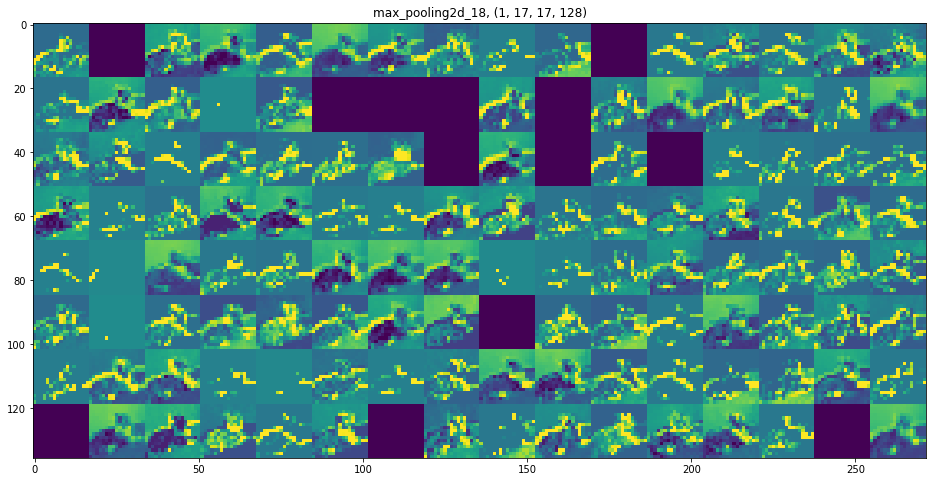

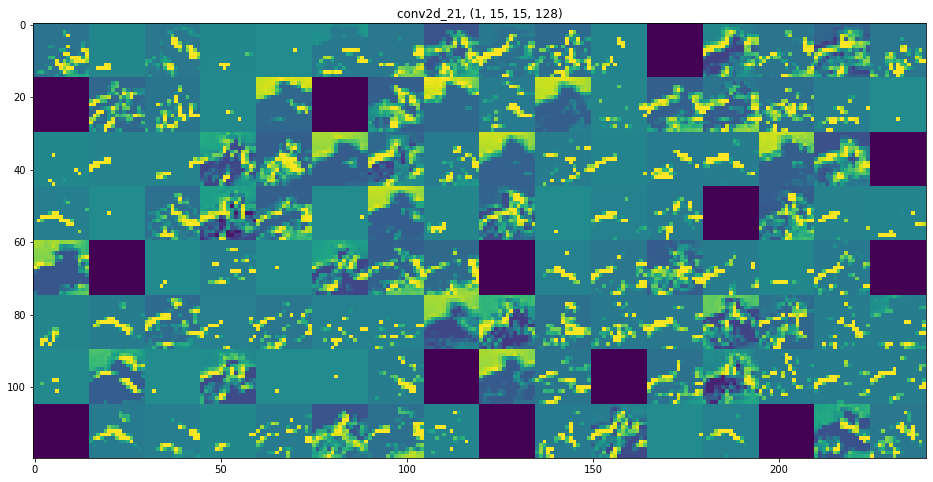

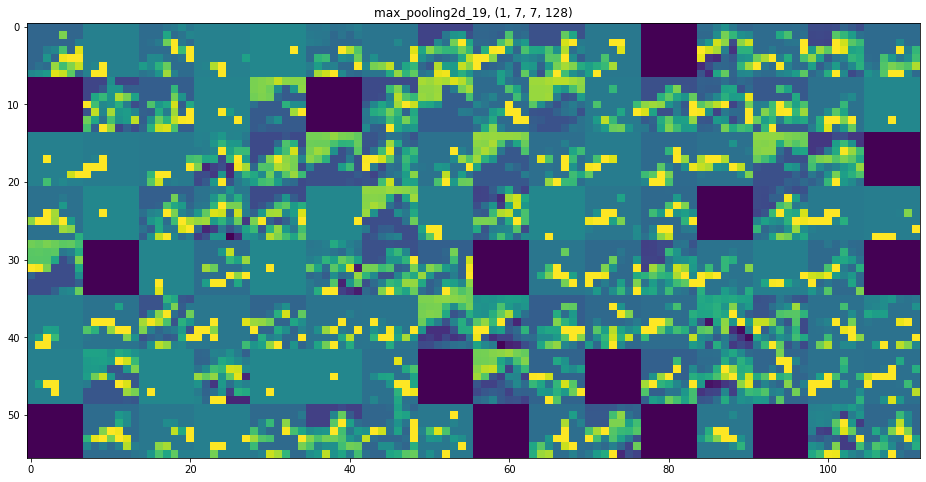

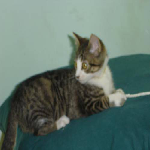

In [328]:
img
import keras

layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    
    n_features = layer_activation.shape[-1] # Nombre de features dans la feature map
    size       = layer_activation.shape[1] # Dimension de la  feature map

    n_cols       = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # On standardise les features pour qu'elles soient acceptables
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # affichage de la grille 
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(f"{layer_name}, {layer_activation.shape}")
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()
img

In [324]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 15, 15, 128)      

# 7) TRANSFER_LEARNING 
Using pre-trained model (VGG with ImageNet) 

In [459]:
VGG19_model = keras.applications.VGG19(
                           weights     = "imagenet"  , 
                           include_top = False       , 
                           input_shape = input_shape )

80142336/80134624 [==============================] - 67s 1us/step


## 7.1) ne pas apprendre sur  les layers existants 

In [460]:
VGG19_model.layers

In [461]:
# freeze feature layers and rebuild model
for l in VGG19_model.layers:
    l.trainable = False

## 7.2) ajouter des layers dense non convulutionnels

In [470]:
from keras.models import Sequential


In [467]:
from keras.layers import Flatten, Dropout, Dense

In [468]:
classification_layers = [
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(1, activation='sigmoid')
]

In [471]:
tous_layers = VGG19_model.layers + classification_layers
model_using_pre_trained_one = Sequential( tous_layers )

### on regarde quels layers sont apprenables

In [472]:
for l in model_using_pre_trained_one.layers:
    print( l.trainable )

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True


## 7.3) on recompile le modèle

In [474]:
model_using_pre_trained_one.compile(loss      = 'binary_crossentropy', 
                                    optimizer = 'adam', 
                                    metrics   = ['accuracy'])

### on regarde les poids

In [475]:
model_using_pre_trained_one.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 37, 37, 256)      

## 7.4) on ré-apprend

In [476]:
history = model_using_pre_trained_one.fit_generator(
                              train_generator                   ,
                              steps_per_epoch  = 100            ,
                              epochs           = 3             ,
                              validation_data  = test_generator ,
                              validation_steps = 50             )

Epoch 1/3
100/100 [==============================] - 282s 3s/step - loss: 0.5291 - accuracy: 0.7345 - val_loss: 0.3680 - val_accuracy: 0.8640
Epoch 2/3
100/100 [==============================] - 1003s 10s/step - loss: 0.3530 - accuracy: 0.8480 - val_loss: 0.5840 - val_accuracy: 0.8290
Epoch 3/3
100/100 [==============================] - 295s 3s/step - loss: 0.3700 - accuracy: 0.8330 - val_loss: 0.5660 - val_accuracy: 0.7990


### 7.5) On regarde les performances

In [540]:
histoire = history.history
df = pd.DataFrame(histoire)
df

,val_loss,val_accuracy,loss,accuracy
0,0.368001,0.864,0.529093,0.7345
1,0.583991,0.829,0.353003,0.8480
2,0.565982,0.799,0.369982,0.8330
